In [39]:
import numpy as np
import pandas as pd
import geopandas as gp
import shapely
from fiona.crs import from_epsg
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [61]:
ct_shape = gp.GeoDataFrame.from_file('nycb2010_16d/nycb2010.shp')

In [57]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820313 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [42]:
ct_shape = ct_shape[ct_shape.BoroName=='Brooklyn']

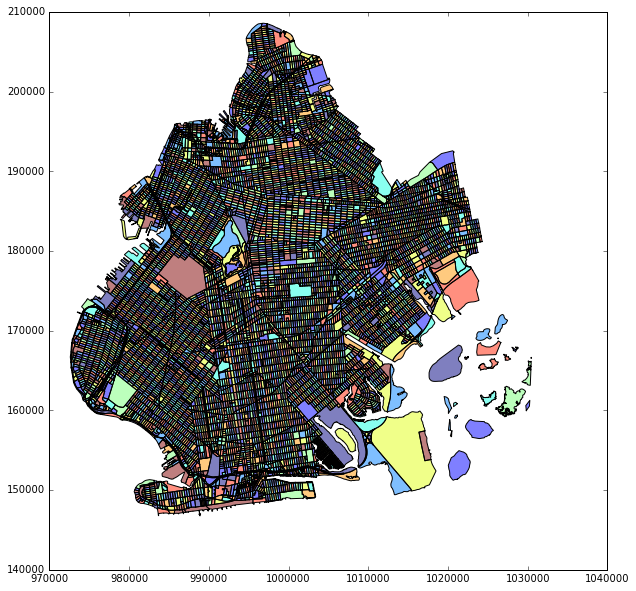

In [43]:
ct_shape.plot(figsize=(10,10))

### Figure 1
Shows all Brooklyn census tracks.

In [44]:
# Convert coordinates from feet to lat/long
ct_shape.crs = from_epsg(2263)
ct_latlong = ct_shape.to_crs(epsg=4326).geometry

__CUSP coordinates: {-73.986403, 40.693217}__ (_source_: maps.google.com)

In [7]:
#ct_latlong = ct_latlong.reset_index()

In [45]:
ct_shape.geometry = ct_latlong.geometry
ct_shape = ct_shape.reset_index()

In [46]:
point = shapely.geometry.Point(-73.986403, 40.693217)
for i, ct in enumerate(ct_shape.geometry):
    shape = shapely.geometry.asShape(ct)
    if shape.contains(point):
        print 'CUSP is located in census track:', ct_shape.CT2010[i]
        print 'CUSP is located in:', ct #ct_shape.geometry[i]
        cusp_index = i

CUSP is located in census track: 001100
CUSP is located in: POLYGON ((-73.98619262163143 40.693753518938, -73.98621117787486 40.69338386010246, -73.98622595691907 40.69308831340506, -73.98725396415627 40.6931249027317, -73.98722751058246 40.69379951950234, -73.98619262163143 40.693753518938))


In [47]:
cusp_index

9061

In [48]:
ct_shape.head()

,index,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365176...
1,5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
2,5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
3,5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
4,5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125493 40.69837793354038...


In [49]:
len(ct_shape)

9682

In [50]:
# Getting every 10th track
ct_split = ct_shape.iloc[0:len(ct_shape):10, :]

In [51]:
len(ct_split)

969

In [52]:
# Getting CUSP census track
ct_cusp = ct_shape.iloc[[cusp_index], :]
ct_cusp = gp.GeoDataFrame(ct_cusp)

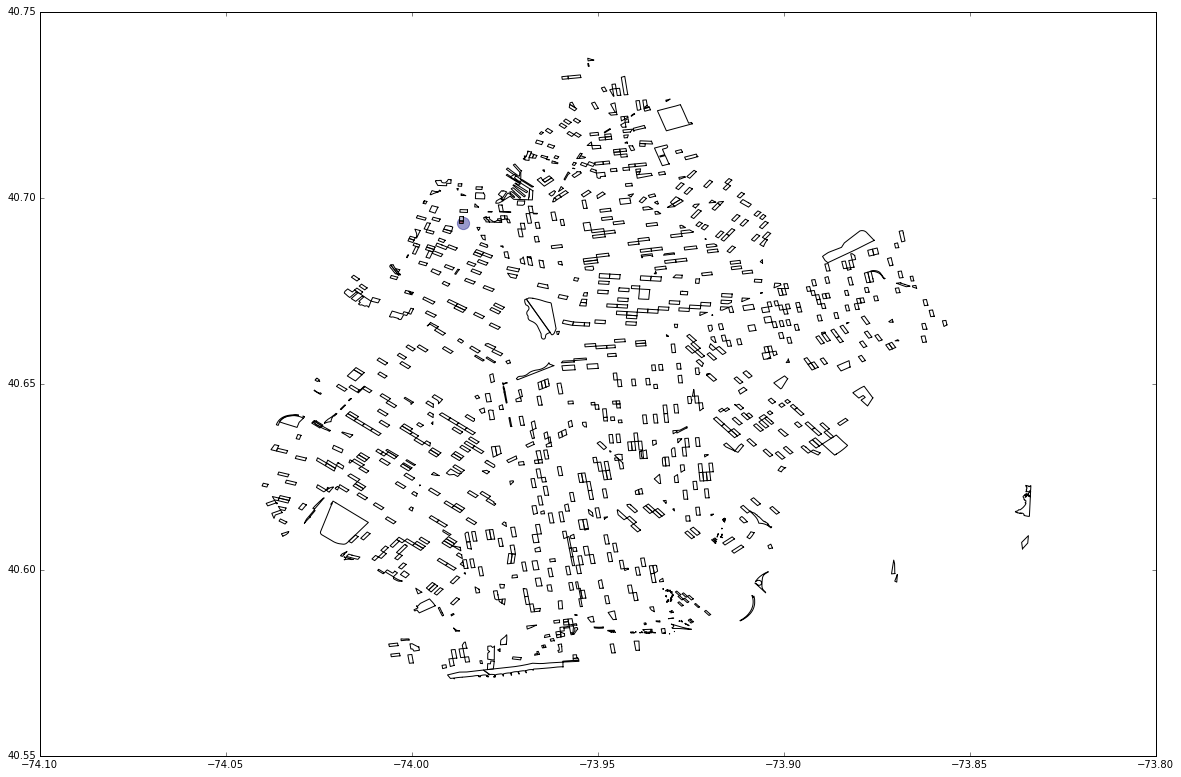

In [54]:
ax1 = ct_split.plot(figsize=(20,20), color='white')
ct_cusp.plot(color='firebrick',ax=ax1)
plt.scatter(-73.986403, 40.693217, s=150, color='navy', alpha=0.4)

### Figure 2
Plots every 10th census track included in the data. Shows the census track where CUSP is located (in red) and CUSP's location (in blue).